In [1]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [2]:
data = pd.read_excel("D:/IPB/Skripsi/Data/Raw Data/hargaBP.xlsx")
data = data.loc[:, ['Tanggal', 'Boxcox', 'Diff']]
data['Diff'] = data['Diff']/100
data['DiffA'] = data['Diff']*100
print(data.head())
print(data.shape)

     Tanggal    Boxcox      Diff      DiffA
0 2021-07-01  0.000035       NaN        NaN
1 2021-07-02  0.000035  0.137591  13.759071
2 2021-07-03  0.000035 -0.224593 -22.459349
3 2021-07-04  0.000036  0.426651  42.665114
4 2021-07-05  0.000035 -0.164347 -16.434656
(974, 4)


In [3]:
print(data.tail())

       Tanggal    Boxcox      Diff      DiffA
969 2024-02-25  0.000026 -0.046630  -4.663018
970 2024-02-26  0.000026 -0.145462 -14.546224
971 2024-02-27  0.000026  0.092376   9.237631
972 2024-02-28  0.000026  0.039794   3.979392
973 2024-02-29  0.000026 -0.191206 -19.120560


# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih sebanyak 914 amatan dan data uji sebanyak 60 amatan.

Jumlah data latih: 914
Jumlah data uji: 60


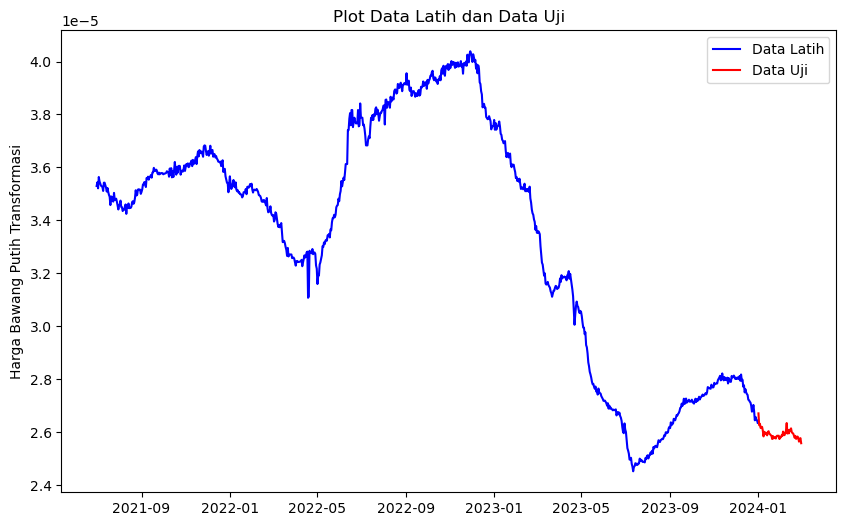

In [4]:
test_size = 60
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Harga Bawang Putih Transformasi')
plt.legend()
plt.show()

Jumlah data latih: 914
Jumlah data uji: 60


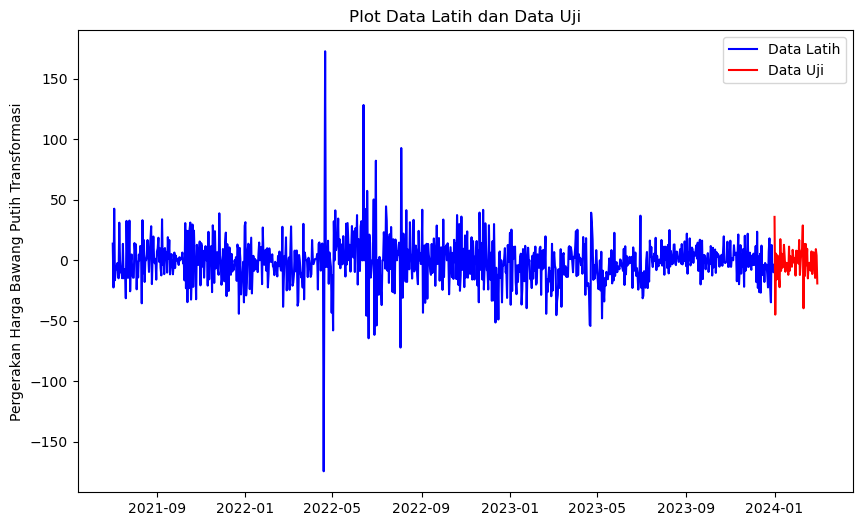

In [5]:
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Pergerakan Harga Bawang Putih Transformasi')
plt.legend()
plt.show()

In [25]:
data_diff = data['Diff'][1:]
train_data_diff = data_diff.iloc[:-test_size]
test_data_diff = data_diff.iloc[-test_size:]

print(train_data_diff.head())
print(train_data_diff.shape)

print(test_data_diff.head())
print(test_data_diff.shape)

1    0.137591
2   -0.224593
3    0.426651
4   -0.164347
5   -0.087868
Name: Diff, dtype: float64
(913,)
914    0.358941
915   -0.448898
916    0.055285
917   -0.158322
918    0.041117
Name: Diff, dtype: float64
(60,)


# Pemodelan GARCH

### Pendugaan Parameter

In [26]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 1) model
model_garch11_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=1)

# Fit the model
result_garch11_diff = model_garch11_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 314635.8314373384
Iteration:      2,   Func. Count:     16,   Neg. LLF: 43588.90238484163
Iteration:      3,   Func. Count:     23,   Neg. LLF: -115.5560010629184
Iteration:      4,   Func. Count:     30,   Neg. LLF: 372.60614386130294
Iteration:      5,   Func. Count:     37,   Neg. LLF: -247.99075521574997
Iteration:      6,   Func. Count:     43,   Neg. LLF: 167.59209429216892
Iteration:      7,   Func. Count:     50,   Neg. LLF: -258.5776189450626
Iteration:      8,   Func. Count:     55,   Neg. LLF: -258.57780824570244
Iteration:      9,   Func. Count:     60,   Neg. LLF: -258.5778086726646
Optimization terminated successfully    (Exit mode 0)
            Current function value: -258.5778086726646
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9


C:\Users\akmal\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03848. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [27]:
# Display model fitting summary
print(result_garch11_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                258.578
Distribution:                  Normal   AIC:                          -509.156
Method:            Maximum Likelihood   BIC:                          -489.889
                                        No. Observations:                  913
Date:                Mon, Jun 03 2024   Df Residuals:                      912
Time:                        19:37:00   Df Model:                            1
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0159  8.109e-03     -1.963  4.965e-

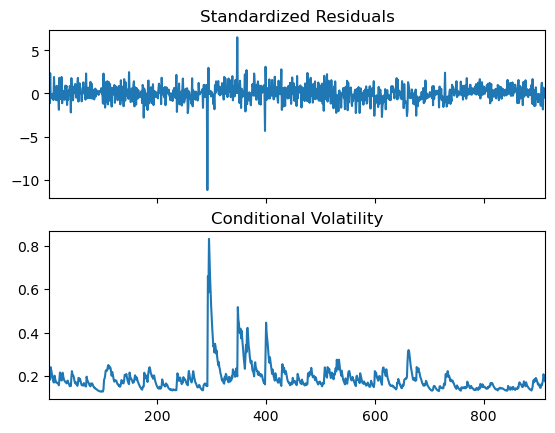

In [28]:
fig = result_garch11_diff.plot()

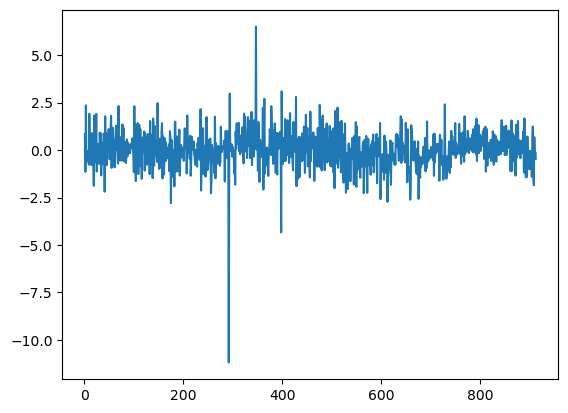

In [29]:
garch_stresidual = result_garch11_diff.resid / result_garch11_diff.conditional_volatility
plt.plot(garch_stresidual)

### Diagnostik Sisaan: Uji Kebebasan Sisaan (Ljung-Box)

$H_0$: Sisaan saling bebas

$H_1$: Sisaan tidak saling bebas

In [32]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

      lb_stat  lb_pvalue
10  14.672506   0.144466


### Diagnostik Sisaan: Uji Normalitas Sisaan (Kolmogorov-Smirnov)

$H_0$: Sisaan menyebar normal

$H_1$: Sisaan tidak menyebar normal

In [30]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

0.0020132656198354015


### Diagnostik Sisaan: Uji Nilai Harapan Sisaan (t-test)

$H_0$: Nilai harapan sisaan nol

$H_1$: Nilai harapan sisaan tidak nol

In [31]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.3203796718966541


In [ ]:
garch_stresidual.to_excel("D:/IPB/Skripsi/Data/Prediksi GARCH/garch_stresidual.xlsx", index=False)

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [15]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 913)

### Prediksi pada Data Latih

In [33]:
predicted_train = result_garch11_diff.conditional_volatility * epsilon_train - 0.0159
predicted_train

1      0.075549
2     -0.041080
3      0.105894
4      0.351329
5     -0.069226
         ...   
909    0.099708
910    0.436173
911   -0.077717
912    0.025522
913    0.028280
Name: cond_vol, Length: 913, dtype: float64

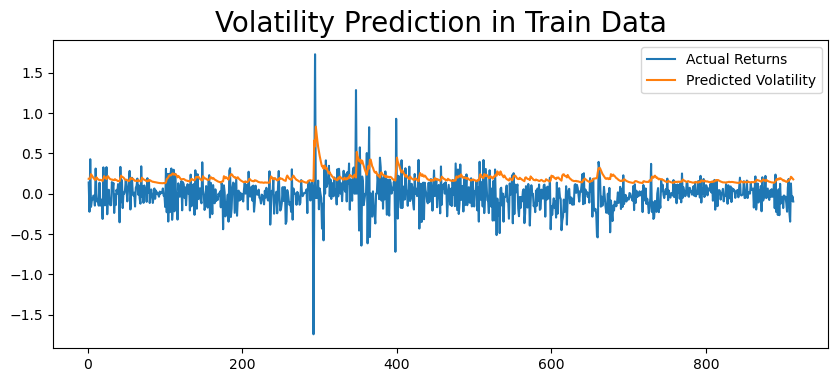

In [35]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(result_garch11_diff.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

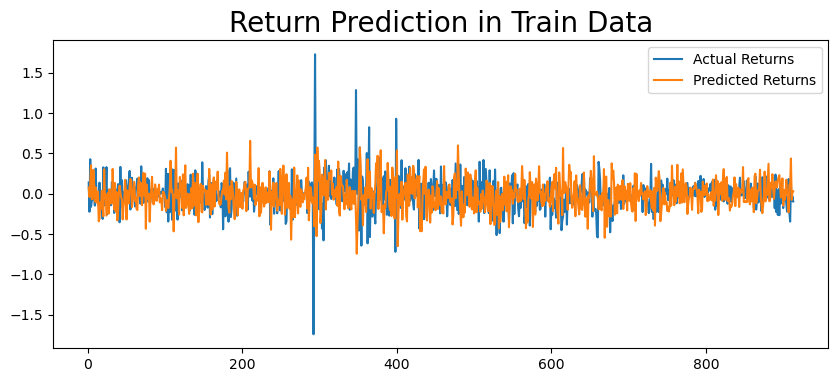

In [36]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [24]:
predicted_train.to_excel("D:/IPB/Skripsi/Data/Prediksi GARCH/predicted_train10^8.xlsx", index=False)

### Prediksi pada Data Uji 

In [37]:
condvar_test = []

for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\akmal\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03848. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\akmal\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03859. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\akmal\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleW

In [38]:
condvar_test

[0.16991518086495425,
 0.21320627290000171,
 0.2568028301292594,
 0.2350454324001241,
 0.2220177036376392,
 0.205641050815174,
 0.19091635987157982,
 0.1841185041124518,
 0.18925066472067312,
 0.1909454423266853,
 0.18057506798955802,
 0.17194501112038263,
 0.1636478691309439,
 0.1561878828246956,
 0.1592716708311255,
 0.1532038034638845,
 0.15030813880187524,
 0.1449680284322463,
 0.140710474935917,
 0.1370877375832502,
 0.13979380760232565,
 0.14497572186229524,
 0.14291766199661757,
 0.13994168598566226,
 0.13664394943717806,
 0.13416921706042964,
 0.1372838126065373,
 0.13454344685061406,
 0.13150971326070904,
 0.12972256028306225,
 0.1345666532615785,
 0.13657249486590098,
 0.13286121268233644,
 0.13446155832879927,
 0.13107307129994333,
 0.14721789058787288,
 0.1472604512533721,
 0.1414384608147667,
 0.14105702433210146,
 0.14292904118122127,
 0.18127767386001473,
 0.2260013924476511,
 0.214740234509442,
 0.2020593374284009,
 0.19570340798157837,
 0.18176558346948815,
 0.17524943

In [39]:
condvar_test = pd.Series(condvar_test, index=data_diff.index[-60:])
print(condvar_test)

914    0.169915
915    0.213206
916    0.256803
917    0.235045
918    0.222018
919    0.205641
920    0.190916
921    0.184119
922    0.189251
923    0.190945
924    0.180575
925    0.171945
926    0.163648
927    0.156188
928    0.159272
929    0.153204
930    0.150308
931    0.144968
932    0.140710
933    0.137088
934    0.139794
935    0.144976
936    0.142918
937    0.139942
938    0.136644
939    0.134169
940    0.137284
941    0.134543
942    0.131510
943    0.129723
944    0.134567
945    0.136572
946    0.132861
947    0.134462
948    0.131073
949    0.147218
950    0.147260
951    0.141438
952    0.141057
953    0.142929
954    0.181278
955    0.226001
956    0.214740
957    0.202059
958    0.195703
959    0.181766
960    0.175249
961    0.172507
962    0.162361
963    0.153927
964    0.148680
965    0.145277
966    0.144134
967    0.144001
968    0.139455
969    0.138865
970    0.135021
971    0.140919
972    0.142649
973    0.139188
dtype: float64


In [40]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 60)

In [41]:
predicted_test = condvar_test * epsilon_test - 0.0159 
predicted_test

914    0.068499
915   -0.045379
916    0.150428
917    0.342081
918   -0.067886
919   -0.064048
920    0.285598
921    0.125399
922   -0.104748
923    0.087699
924   -0.099582
925   -0.095980
926    0.023697
927   -0.314731
928   -0.290631
929   -0.102045
930   -0.168137
931    0.029656
932   -0.143668
933   -0.209510
934    0.188989
935   -0.048632
936   -0.006249
937   -0.215282
938   -0.090287
939   -0.001018
940   -0.173913
941    0.034648
942   -0.094890
943   -0.053739
944   -0.096870
945    0.237070
946   -0.017693
947   -0.158121
948    0.091913
949   -0.195630
950    0.014857
951   -0.293073
952   -0.203250
953    0.012237
954    0.117968
955    0.022829
956   -0.040734
957   -0.076741
958   -0.305252
959   -0.146743
960   -0.096627
961    0.166461
962    0.039890
963   -0.287280
964    0.032285
965   -0.071843
966   -0.113468
967    0.072182
968    0.127878
969    0.113422
970   -0.129212
971   -0.059474
972    0.031354
973    0.119884
dtype: float64

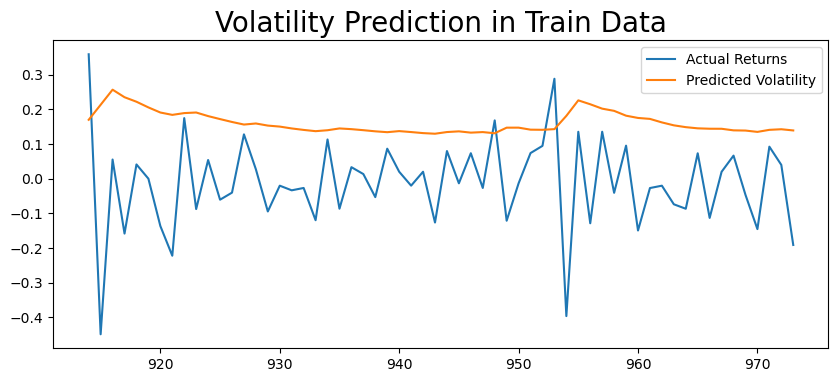

In [43]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['Diff'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

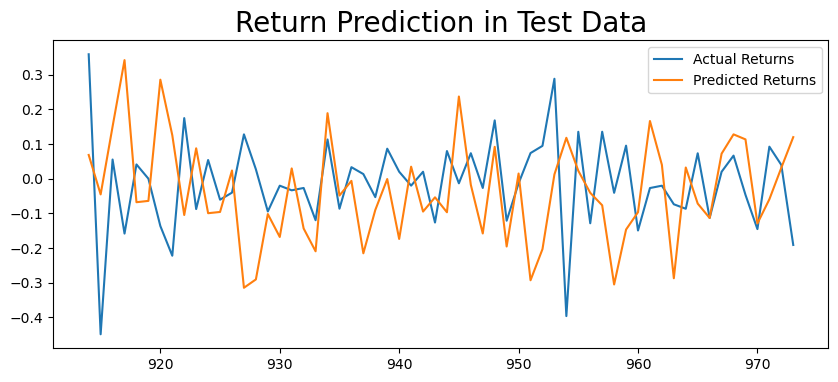

In [44]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diff[-60:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [45]:
predicted_test.to_excel("D:/IPB/Skripsi/Data/Prediksi GARCH/predicted_test_10^6.xlsx", index=False)

# Peramalan

Peramalan (_forecasting_) terhadap data dilakukan hingga 120 periode ke depan.

In [46]:
from datetime import datetime, timedelta

data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=120)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,121)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 120 Days')

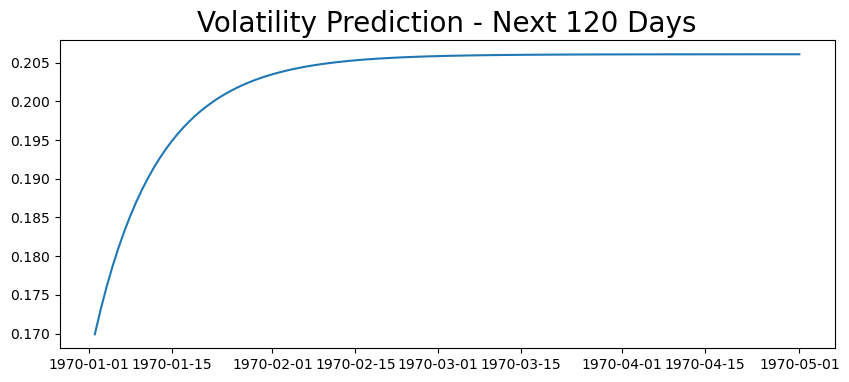

In [47]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 120 Days', fontsize=20)

In [48]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 120)

In [49]:
predicted_forecast = condvar_forecast * epsilon_forecast - 0.0159
predicted_forecast

1970-01-02 00:00:00.000000973    0.068499
1970-01-03 00:00:00.000000973   -0.039840
1970-01-04 00:00:00.000000973    0.098137
1970-01-05 00:00:00.000000973    0.256273
1970-01-06 00:00:00.000000973   -0.058304
                                   ...   
1970-04-27 00:00:00.000000973    0.046243
1970-04-28 00:00:00.000000973   -0.023053
1970-04-29 00:00:00.000000973   -0.256742
1970-04-30 00:00:00.000000973    0.219614
1970-05-01 00:00:00.000000973    0.139059
Length: 120, dtype: float64

Text(0.5, 1.0, 'Return Forecast - Next 30 Days')

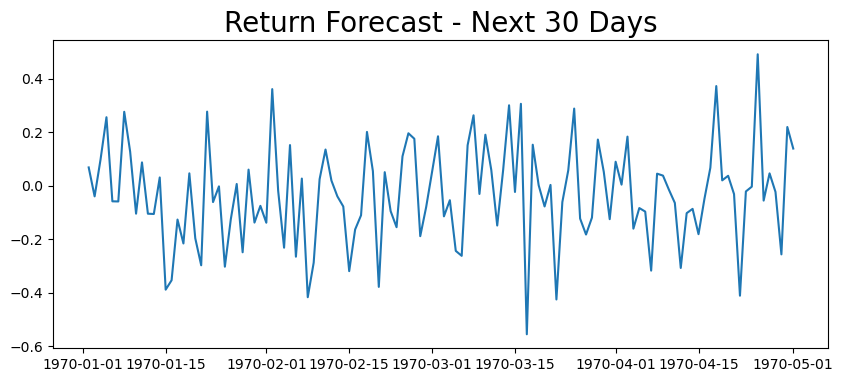

In [50]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 30 Days', fontsize=20)

In [51]:
predicted_forecast.to_excel("D:/IPB/Skripsi/Data/Prediksi GARCH/forecasted_return_120_10^6.xlsx", index=False)